In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')

In [7]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

In [8]:
svm_model.fit(X_train, y_train)

SVC(gamma='auto')

In [9]:
y_pred = svm_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu SVM z walidacją krzyżową: {:.2f}%".format(accuracy * 100))

Dokładność modelu SVM z walidacją krzyżową: 97.37%


In [11]:
classification_rep = classification_report(y_test, y_pred, target_names=data.target_names)
print("Raport klasyfikacji z walidacją krzyżową:\n", classification_rep)

Raport klasyfikacji z walidacją krzyżową:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji z walidacją krzyżową:\n", conf_matrix)

Macierz konfuzji z walidacją krzyżową:
 [[41  2]
 [ 1 70]]


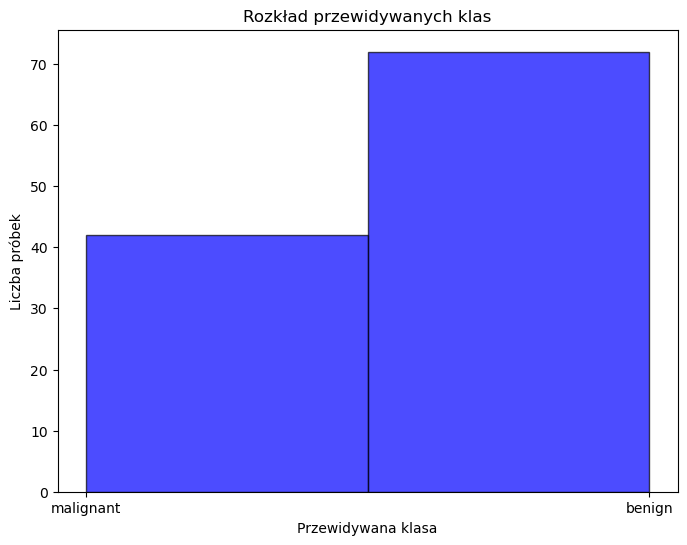

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=2, alpha=0.7, color='b', edgecolor='black')
plt.xticks(np.arange(2), data.target_names)
plt.xlabel("Przewidywana klasa")
plt.ylabel("Liczba próbek")
plt.title("Rozkład przewidywanych klas")
plt.show()